# Benchmarking (performance)
Testing the performance of the CLI versus scanpy PCA in performance and memory usage.

Note: any commands run that build the tool will require a repository restart. DO NOT commit the built repo.

## PCisA Time Performance
---

In [3]:
%%bash
cd ..
pip install -e .

DEPRECATION: Loading egg at /Users/isa/.pyenv/versions/3.12.3/envs/pcisa/lib/python3.12/site-packages/kiwisolver-1.4.5-py3.12-macosx-14.3-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/isa/.pyenv/versions/3.12.3/envs/pcisa/lib/python3.12/site-packages/fonttools-4.51.0-py3.12-macosx-14.3-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/isa/.pyenv/versions/3.12.3/envs/pcisa/lib/python3.12/site-packages/matplotlib-3.9.0-py3.12-macosx-14.3-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com

Obtaining file:///Users/isa/sp24/CSE%20185/cse185-project-pcisa
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for pcisa (pyproject.toml): started
  Building editable for pcisa (pyproject.toml): finished with status 'done'
  Created wheel for pcisa: filename=pcisa-0.0.0-0.editable-py3-none-any.whl size=2946 sha256=9a5a45e8e1827d9ef41db5341eb35ae7fd7ea4ec07688e661d0a2e459d5aff73
  Stored in directory: /private/var/folders/

In [5]:
%%bash
time pcisa -f E-MTAB-5727.aggregated_filtered_counts.mtx -n 2 -p -o pca_out1.csv

Running PCA on E-MTAB-5727.aggregated_filtered_counts.mtx with 2 principal components.
Option file: E-MTAB-5727.aggregated_filtered_counts.mtx
Option n_pcs: 2
Option output: pca_out1.csv
Option plot: True
Running PCA! Please wait.
PCA results saved to /Users/isa/sp24/CSE 185/cse185-project-pcisa/benchmark/pca_out1.csv
PCA plot saved to quickPCA.png in /Users/isa/sp24/CSE 185/cse185-project-pcisa/benchmark



real	0m56.081s
user	1m23.422s
sys	0m7.370s


## scanpy PCA Time Performance
---

In [6]:
%%bash
pip install scanpy

DEPRECATION: Loading egg at /Users/isa/.pyenv/versions/3.12.3/envs/pcisa/lib/python3.12/site-packages/kiwisolver-1.4.5-py3.12-macosx-14.3-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/isa/.pyenv/versions/3.12.3/envs/pcisa/lib/python3.12/site-packages/fonttools-4.51.0-py3.12-macosx-14.3-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/isa/.pyenv/versions/3.12.3/envs/pcisa/lib/python3.12/site-packages/matplotlib-3.9.0-py3.12-macosx-14.3-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com

  Using cached scanpy-1.10.1-py3-none-any.whl.metadata (8.6 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached legacy_api_wrap-1.4-py3-none-any.whl.metadata (1.8 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached numba-0.59.1-cp312-cp312-macosx_10_9_x86_64.whl.metadata (2.7 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached pynndescent-0.5.12-py3-none-any.whl.metadata (6.8 kB)
  Using cached scikit_learn-1.5.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached session_info-1.0.0-py3-none-any.whl
  Using cached statsmodels-0.14.2-cp312-cp312-macosx_10_9_x86_64.whl.metadata (9.2 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached llvmlite-0.42.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (4.8 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached stdli

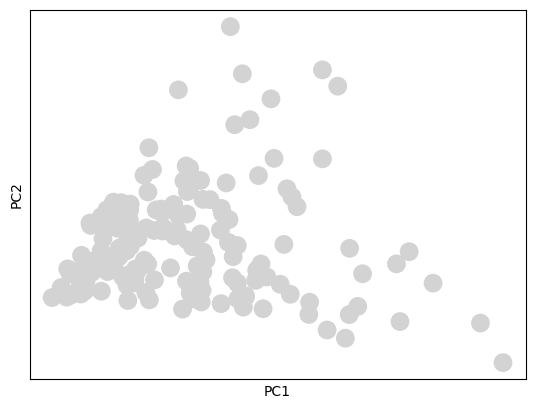

In [2]:
import scanpy as sc
import anndata as ad
from anndata import AnnData

from scipy.io import mmread

adata = AnnData(X=mmread("E-MTAB-5727.aggregated_filtered_counts.mtx").toarray().T)

sc.tl.pca(adata)
sc.pl.pca(adata)

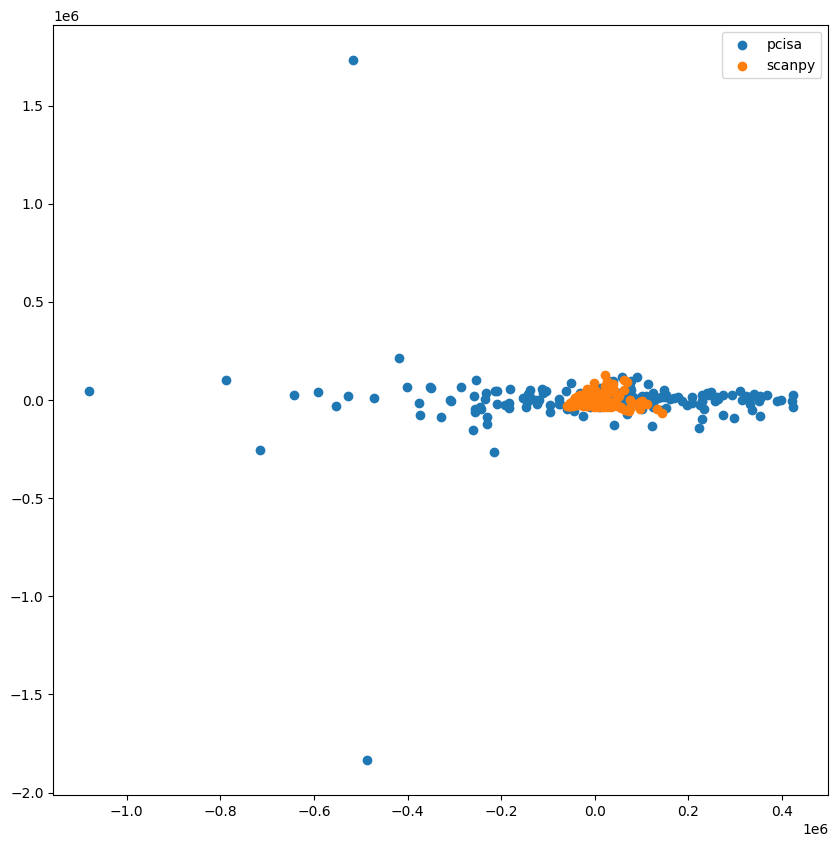

In [5]:
# plotting both in the same plot

import matplotlib.pyplot as plt
import pandas as pd

pca_pcisa = pd.read_csv("pca_out1.csv", index_col=0)
#normalize pcisa data to scale of scanpy data
pca_pcisa = pca_pcisa * adata.obsm["X_pca"].std() + adata.obsm["X_pca"].mean()

# make the plot square
plt.figure(figsize=(10,10))

plt.scatter(pca_pcisa["PC1"], pca_pcisa["PC2"], label="pcisa")
plt.scatter(adata.obsm["X_pca"][:,0], adata.obsm["X_pca"][:,1], label="scanpy")

plt.legend()
plt.show()